<div align="center">

# **Gold & Diamonds Market Analysis**  
### *An Industry Perspective by Om Arvadia*  

📅 **Date:** August 14, 2025  
🛠 **Tools:** Python • pandas • NumPy • Matplotlib  

---



## **About This Project**  

</div>

As someone working in the diamond and gold industry, I wanted to better understand how different factors influence the pricing of these precious commodities. For gold, the analysis primarily focuses on historical price trends, since gold valuation is largely determined by its karat and overall market demand. The aim was to uncover patterns over time, identify possible economic or global events affecting prices, and visualize how gold’s value has shifted through different periods.  

Diamonds, on the other hand, are priced using a much more complex set of characteristics. In this study, I analyzed how carat weight, cut quality, color grade, and clarity interact to shape pricing. By breaking down the data, we can see how each of these attributes contributes to value, compare the impact of different quality levels, and explore the premium customers are willing to pay for top-tier stones. Together, these insights offer a clearer picture of how both gold and diamonds behave in the market—one driven mostly by purity and demand, and the other by a multi-dimensional quality assessment.  

In [17]:
# Locate and verify the gold and diamond datasets before loading.
# This ensures the correct file paths are set, whether files are in the local folder or /mnt/data (Colab/Kaggle).

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11, 5)
plt.rcParams['axes.grid'] = True

# Expected CSV file paths (I added options just incase to handle different environments)
GOLD_PATHS = ['gold_monthly.csv', 'monthly_gold_price.csv', '/mnt/data/gold_monthly.csv']
DIAMONDS_PATHS = ['diamonds.csv', '/mnt/data/diamonds.csv']

def pick_path(candidates):
    """Return the first existing file path from the list of candidates."""
    for p in candidates:
        if os.path.exists(p):
            return p
    return None

GOLD_FILE = pick_path(GOLD_PATHS)
DIAMONDS_FILE = pick_path(DIAMONDS_PATHS)

if GOLD_FILE:
    print(f"Successfully located Gold data file: {GOLD_FILE}")
else:
    print("Gold data file not found.")

if DIAMONDS_FILE:
    print(f"Successfully located Diamonds data file: {DIAMONDS_FILE}")
else:
    print("Diamonds data file not found.")

if GOLD_FILE is None or DIAMONDS_FILE is None:
    raise FileNotFoundError("One or both CSV files are missing. Please upload them before running the analysis.")


Successfully located Gold data file: gold_monthly.csv
Successfully located Diamonds data file: diamonds.csv


## 1) Gold — Load & Clean  
In this section, I import the gold price dataset, detect and standardize key columns (date and price), handle missing or duplicate records, and ensure a consistent monthly time series for analysis.


In [19]:
# Load gold price data
gold_raw = pd.read_csv(GOLD_FILE)
print(f"Loaded Gold dataset with {gold_raw.shape[0]} rows and {gold_raw.shape[1]} columns.")
print("Columns:", list(gold_raw.columns))
display(gold_raw.head())

dfg = gold_raw.copy()
lower_map = {c.lower(): c for c in dfg.columns}

# Detect date column
date_col = next((lower_map[k] for k in ['date', 'month', 'time', 'period', 'timestamp'] if k in lower_map), None)

# Detect price column
price_col = next((lower_map[k] for k in ['price', 'usd', 'value', 'close', 'gold', 'gold_price'] if k in lower_map), None)

if date_col is None or price_col is None:
    raise ValueError("Date and/or price column not found in Gold CSV.")

# Keep and rename key columns
dfg = dfg[[date_col, price_col]].rename(columns={date_col: 'date', price_col: 'gold_price'})

# Convert date, clean missing/duplicates
dfg['date'] = pd.to_datetime(dfg['date'], errors='coerce')
dfg = dfg.dropna(subset=['date', 'gold_price']).drop_duplicates(subset=['date']).sort_values('date')

# Standardize to monthly frequency, fill gaps
dfg = dfg.set_index('date').asfreq('MS').interpolate('linear').reset_index()

print(f"Cleaned Gold dataset: {dfg.shape[0]} rows, {dfg.shape[1]} columns.")
display(dfg.head())
display(dfg.tail())

Loaded Gold dataset with 847 rows and 2 columns.
Columns: ['Date', 'Price']


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


Cleaned Gold dataset: 847 rows, 2 columns.


,date,gold_price
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


,date,gold_price
842,2020-03-01,1593.764
843,2020-04-01,1680.030
844,2020-05-01,1715.697
845,2020-06-01,1734.032
846,2020-07-01,1840.807


## 2) Gold — Exploratory Analysis  

Analyzing historical gold prices to understand market behavior over time. Focus is on price trends since gold value is driven mainly by weight and purity (karats).
What I waas thinking about was:  
- Visualizing long-term trends and volatility  
- Examining monthly and yearly price changes for seasonality or cycles  
- Identifying major peaks and troughs in the dataset  

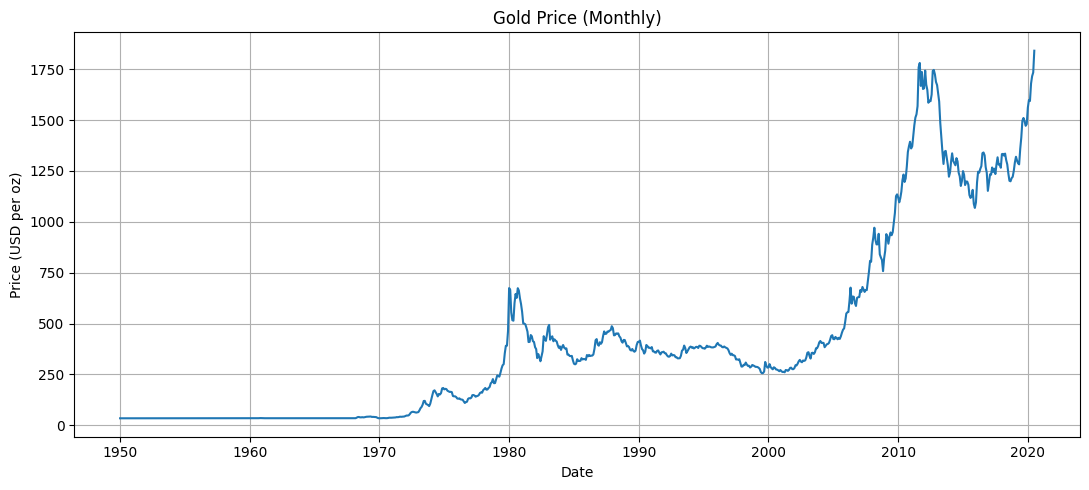

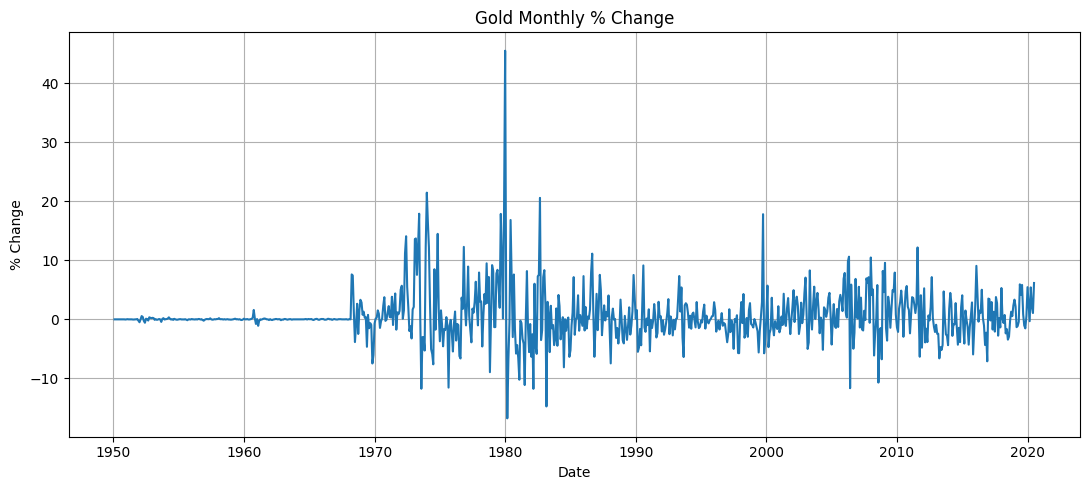

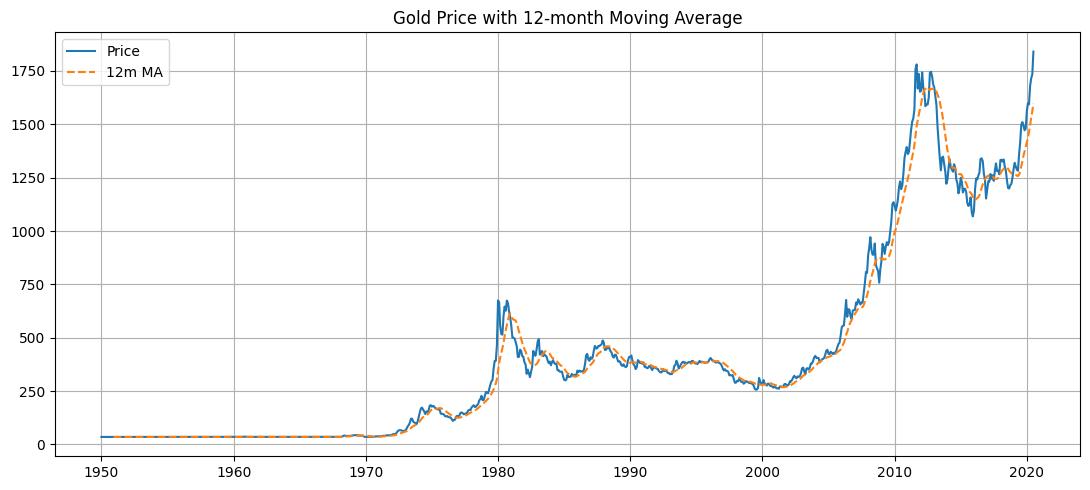

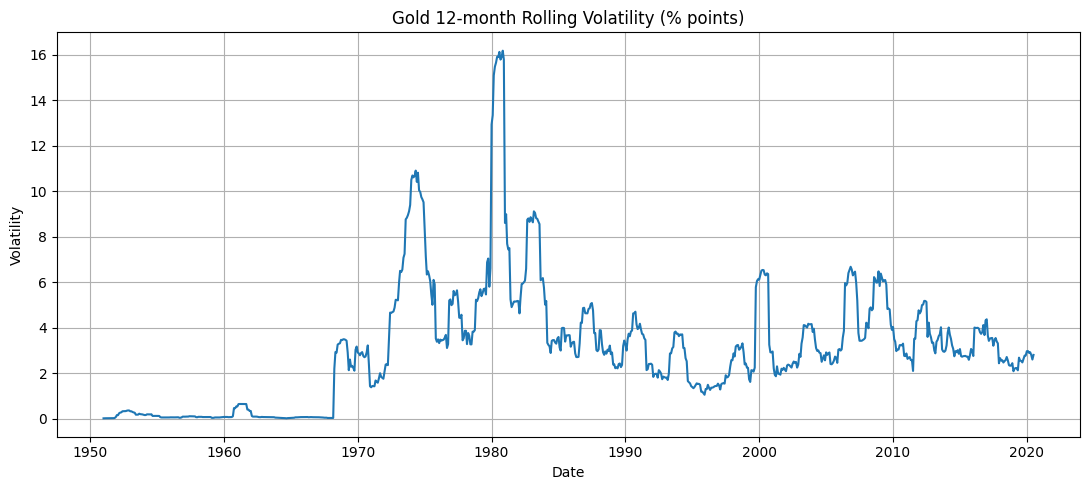

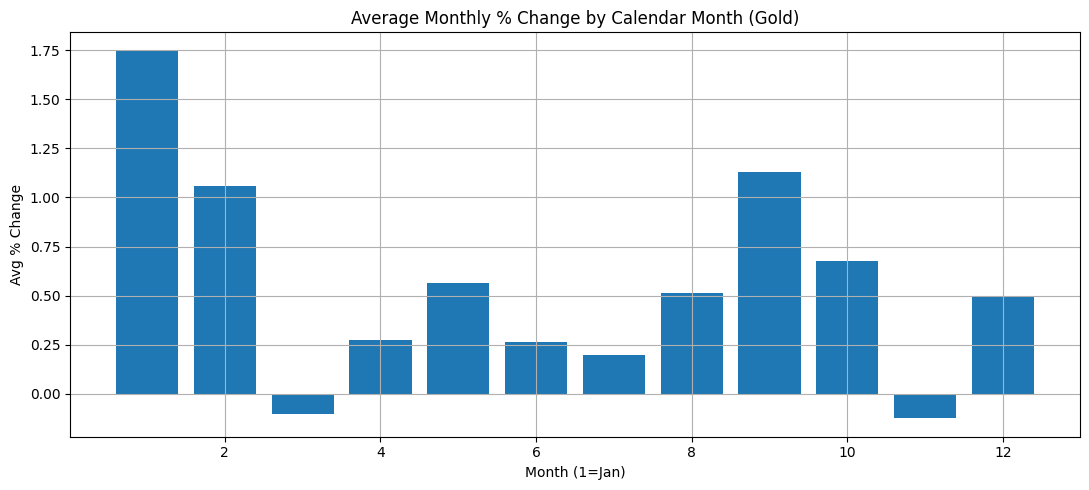

In [35]:

# Trend plot
plt.plot(dfg['date'], dfg['gold_price'])
plt.title('Gold Price (Monthly)')
plt.xlabel('Date'); plt.ylabel('Price (USD per oz)')
plt.tight_layout(); plt.show()

# Returns
dfg['pct_change'] = dfg['gold_price'].pct_change()*100
dfg['log_return'] = np.log(dfg['gold_price']).diff()

fig = plt.figure()
plt.plot(dfg['date'], dfg['pct_change'])
plt.title('Gold Monthly % Change')
plt.xlabel('Date'); plt.ylabel('% Change')
plt.tight_layout(); plt.show()

# Rolling stats
dfg['roll_12m'] = dfg['gold_price'].rolling(12).mean()
dfg['roll_12m_vol'] = dfg['pct_change'].rolling(12).std()

plt.plot(dfg['date'], dfg['gold_price'], label='Price')
plt.plot(dfg['date'], dfg['roll_12m'], label='12m MA', linestyle='--')
plt.title('Gold Price with 12‑month Moving Average'); plt.legend()
plt.tight_layout(); plt.show()

plt.plot(dfg['date'], dfg['roll_12m_vol'])
plt.title('Gold 12‑month Rolling Volatility (% points)')
plt.xlabel('Date'); plt.ylabel('Volatility')
plt.tight_layout(); plt.show()

# Seasonality averaged by calendar month
dfg['month_num'] = dfg['date'].dt.month
season = dfg.groupby('month_num')['pct_change'].mean()

plt.bar(season.index, season.values)
plt.title('Average Monthly % Change by Calendar Month (Gold)')
plt.xlabel('Month (1=Jan)'); plt.ylabel('Avg % Change')
plt.tight_layout(); plt.show()

### Gold Analysis — Observations & Insights

Looking at the long-term trend, gold prices have generally climbed over the decades, with sharp surges during times of economic stress. An example being between 2008 and 2011, when prices rose from around 800 USD to over 1,750 USD an ounce during the global financial crisis. This matches my experience in the industry, where gold consistently serves as a safe-haven asset when markets are unstable.

The percentage change chart highlighted major swings in **2020** during the onset of COVID-19, with quick upward moves followed by short-term corrections. The 12-month moving average revealed distinct growth periods — slow and steady in the 1990s, accelerating in the 2000s, and spiking in recent crises. Rolling volatility confirmed that these high-return periods, such as in **2008** and **2020**, were also marked by greater price instability.

Seasonal patterns were subtle, but January and August tended to show slightly stronger average gains. From my perspective, this may be linked to cultural and seasonal buying patterns, such as wedding seasons and festival demand in key markets like India and China. This pattern aligns closely with our own quarterly sales data, as we are an India-based company and see a notable boost in demand during these periods — with Indian buyers continuing to be the largest contributors to our market.

### Taking a deeper look at the fluctations During crisis — Observations & Insights

Average Monthly % Change During Crisis Periods:
Dot-com Bust (2001–2003): 1.18%
Global Financial Crisis (2008–2011): 1.62%
COVID-19 Pandemic (2020–2021): 3.19%


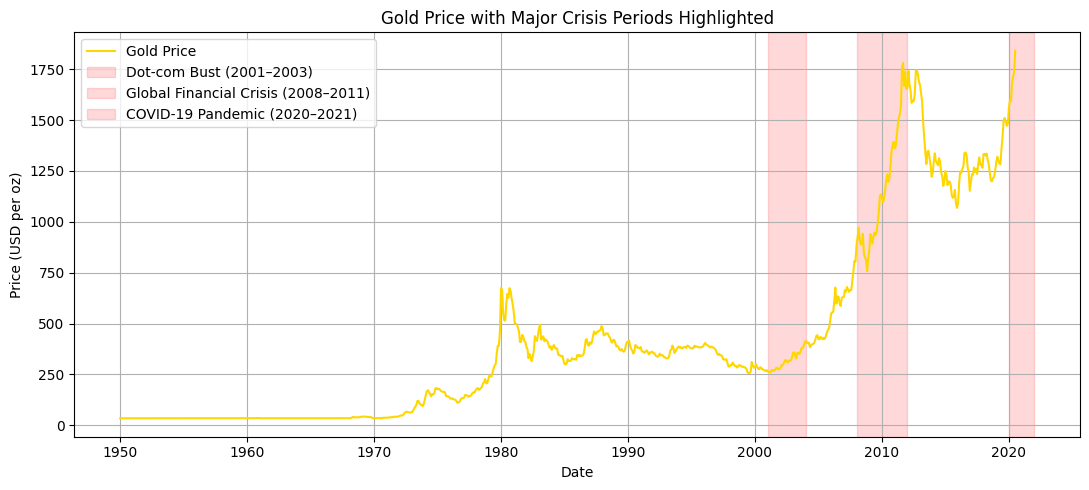

In [36]:
# Crisis periods
crisis_periods = {
    "Dot-com Bust (2001–2003)": ("2001-01-01", "2003-12-31"),
    "Global Financial Crisis (2008–2011)": ("2008-01-01", "2011-12-31"),
    "COVID-19 Pandemic (2020–2021)": ("2020-01-01", "2021-12-31")
}

#  average monthly % change
crisis_averages = {}
for crisis, (start, end) in crisis_periods.items():
    mask = (dfg['date'] >= start) & (dfg['date'] <= end)
    avg_change = dfg.loc[mask, 'pct_change'].mean()
    crisis_averages[crisis] = avg_change

print("Average Monthly % Change During Crisis Periods:")
for crisis, avg in crisis_averages.items():
    print(f"{crisis}: {avg:.2f}%")

fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(dfg['date'], dfg['gold_price'], label='Gold Price', color='gold')

# Shade crisis periods
for crisis, (start, end) in crisis_periods.items():
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.15, label=crisis)

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

ax.set_title("Gold Price with Major Crisis Periods Highlighted")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD per oz)")
plt.tight_layout()
plt.show()


### Taking a deeper look at the fluctations During crisis — Observations & Insights

I expected to see gold’s safe-haven behavior, but quantifying it showed just how strong the effect is. During the Dot-com Bust (2001–2003), gold gained an average of 1.18% per month, climbing to 1.62% during the Global Financial Crisis (2008–2011), and peaking at 3.19% during COVID-19 (2020–2021).

The chart shows each surge beginning quickly after a crisis starts, with momentum often sustained far longer than expected — especially in 2020, where the climb was both steeper and more consistent than previous events. While it appears that gold builds a new floor after each rally, I’m not counting the sharp drop around 2012, which was more of a correction after an unusually extended bull run rather than a structural reset in demand.

## 3) Diamonds — Load & Clean

In [40]:

dia = pd.read_csv(DIAMONDS_FILE)
print("Diamonds raw shape:", dia.shape)
print("Columns:", list(dia.columns))
display(dia.head())

# Standardize expected columns (common Kaggle schema)
# carat, cut, color, clarity, depth, table, price, x, y, z
# We'll coerce types and drop clear outliers or zeros where needed.
needed = ['carat','cut','color','clarity','price']
for c in needed:
    if c not in dia.columns:
        raise ValueError(f"Required column '{c}' not in diamonds CSV.")

# Clean
dfd = dia.copy()
for c in ['carat','price','depth','table','x','y','z']:
    if c in dfd.columns:
        dfd[c] = pd.to_numeric(dfd[c], errors='coerce')

dfd = dfd.dropna(subset=['carat','price'])
dfd = dfd[(dfd['carat']>0) & (dfd['price']>0)]

# Remove extreme geometry outliers if dimensions exist
if all(col in dfd.columns for col in ['x','y','z']):
    dfd = dfd[(dfd['x']>0) & (dfd['y']>0) & (dfd['z']>0)]

print("Diamonds cleaned shape:", dfd.shape)
display(dfd.describe(include='all'))


Diamonds raw shape: (53940, 11)
Columns: ['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Diamonds cleaned shape: (53920, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920,53920,53920,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21548,11284,13063,NaN,NaN,NaN,NaN,NaN,NaN
mean,26972.355731,0.797698,NaN,NaN,NaN,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,NaN,NaN,NaN,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000


## 4) Diamonds — Exploratory Analysis

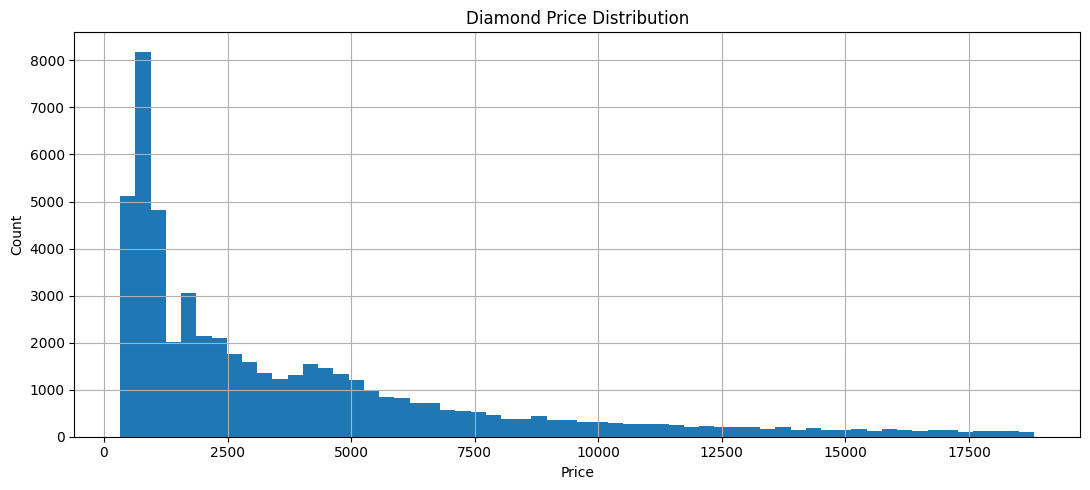

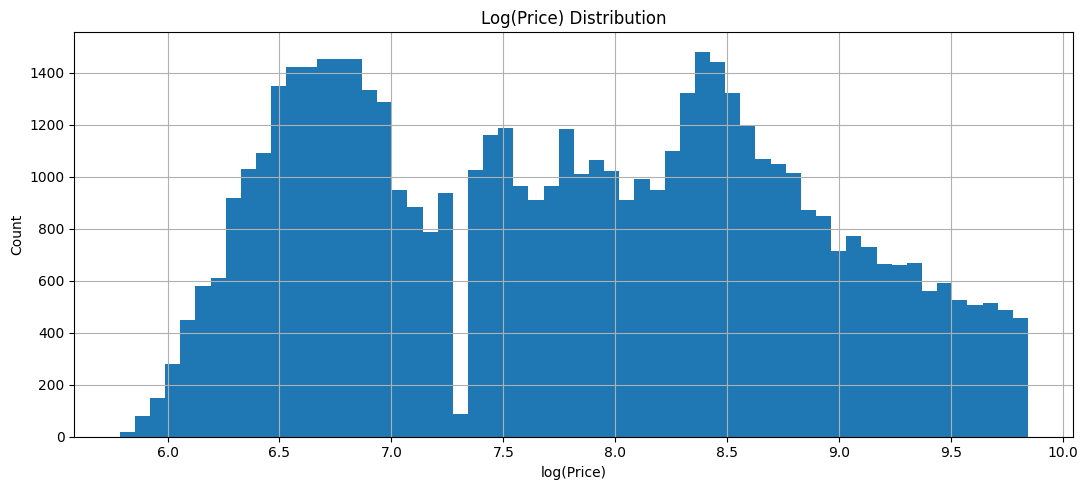

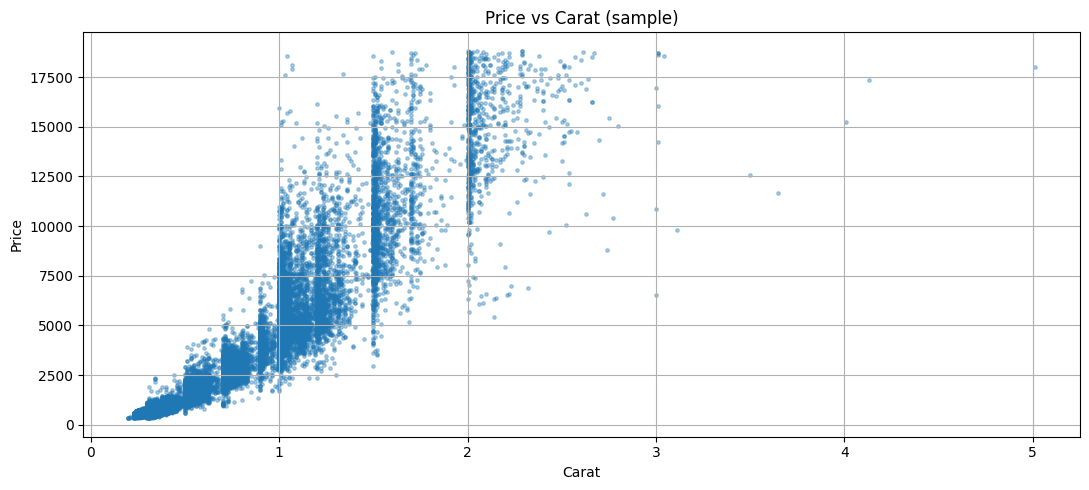

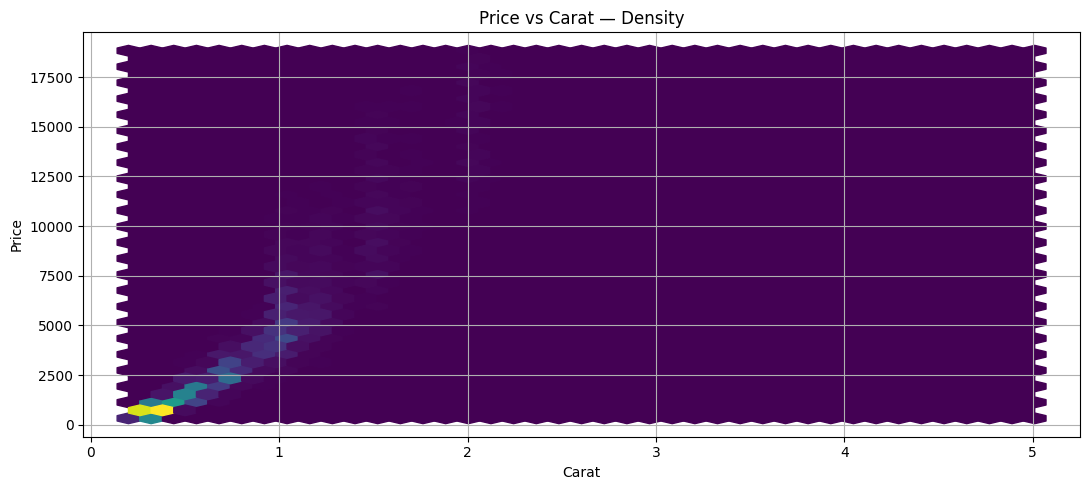

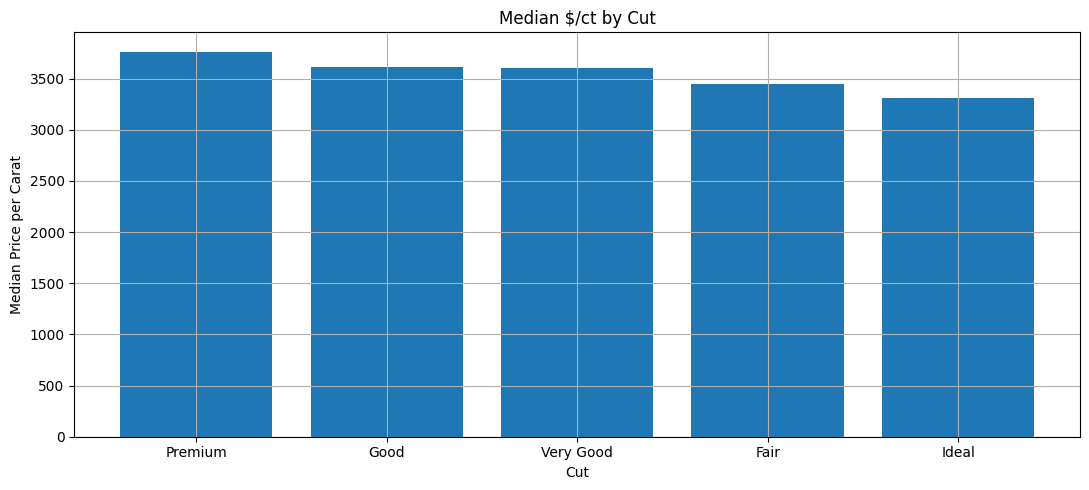

$/ct by Color (25/50/75%):


,0.25,0.50,0.75
color,,,
D,2455.0,3411.0,4749.0
E,2430.0,3254.0,4508.0
F,2587.0,3494.0,4949.0
G,2538.0,3490.0,5497.0
H,2395.0,3818.0,5123.0
I,2344.0,3780.0,5195.0
J,2563.0,3780.0,4928.0


$/ct by Clarity (25/50/75%):


,0.25,0.50,0.75
clarity,,,
I1,2112.0,2887.0,3354.0
IF,2865.0,3156.0,4284.0
SI1,2362.0,3669.0,4928.0
SI2,2999.0,3951.0,4738.0
VS1,2411.0,3450.0,5484.0
VS2,2438.0,3429.0,5484.0
VVS1,2545.0,2982.0,4054.0
VVS2,2455.0,3169.0,4939.0


Diamonds analysis notes:
- Prices rise nonlinearly with carat; log-price often linearizes relationships.
- Quality factors (cut, color, clarity) significantly shift price per carat.
- Distribution is right-skewed; medians are robust summaries.


In [5]:

# Price distribution (linear & log)
plt.hist(dfd['price'], bins=60)
plt.title('Diamond Price Distribution'); plt.xlabel('Price'); plt.ylabel('Count')
plt.tight_layout(); plt.show()

plt.hist(np.log(dfd['price']), bins=60)
plt.title('Log(Price) Distribution'); plt.xlabel('log(Price)'); plt.ylabel('Count')
plt.tight_layout(); plt.show()

# Carat vs Price scatter (sample to avoid overplotting)
sample = dfd.sample(min(len(dfd), 20000), random_state=42)
plt.scatter(sample['carat'], sample['price'], s=6, alpha=0.35)
plt.title('Price vs Carat (sample)'); plt.xlabel('Carat'); plt.ylabel('Price')
plt.tight_layout(); plt.show()

# Hexbin for density
plt.hexbin(sample['carat'], sample['price'], gridsize=40)
plt.title('Price vs Carat — Density'); plt.xlabel('Carat'); plt.ylabel('Price')
plt.tight_layout(); plt.show()

# Price per carat by cut
dfd['price_per_carat'] = dfd['price'] / dfd['carat']
ppc_cut = dfd.groupby('cut', as_index=False)['price_per_carat'].median().sort_values('price_per_carat', ascending=False)

plt.bar(ppc_cut['cut'], ppc_cut['price_per_carat'])
plt.title('Median $/ct by Cut'); plt.xlabel('Cut'); plt.ylabel('Median Price per Carat')
plt.tight_layout(); plt.show()

# Box-like summary using quantiles for color and clarity
color_stats = dfd.groupby('color')['price_per_carat'].quantile([0.25,0.5,0.75]).unstack()
clarity_stats = dfd.groupby('clarity')['price_per_carat'].quantile([0.25,0.5,0.75]).unstack()

print("$/ct by Color (25/50/75%):")
display(color_stats.round(0))
print("$/ct by Clarity (25/50/75%):")
display(clarity_stats.round(0))

print("Diamonds analysis notes:")
print("- Prices rise nonlinearly with carat; log-price often linearizes relationships.")
print("- Quality factors (cut, color, clarity) significantly shift price per carat.")
print("- Distribution is right-skewed; medians are robust summaries.")


## 5) Diamonds — Simple Model: log(Price) ~ log(Carat) + Quality

Coefficients (log-price scale):


const            7.856821
log_carat        1.883745
clarity_IF       1.113650
clarity_VVS1     1.018593
clarity_VVS2     0.947201
clarity_VS1      0.812202
clarity_VS2      0.742110
clarity_SI1      0.592905
clarity_SI2      0.427897
cut_Ideal        0.161269
cut_Premium      0.139403
cut_Very Good    0.117243
cut_Good         0.080137
color_E         -0.054226
color_F         -0.094546
color_G         -0.160207
color_H         -0.251054
color_I         -0.372515
color_J         -0.510951
dtype: float64

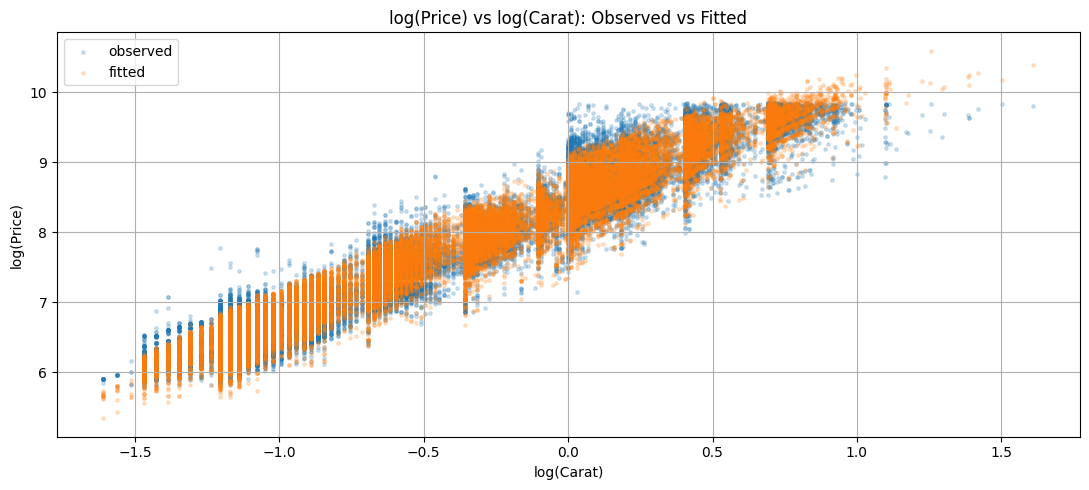

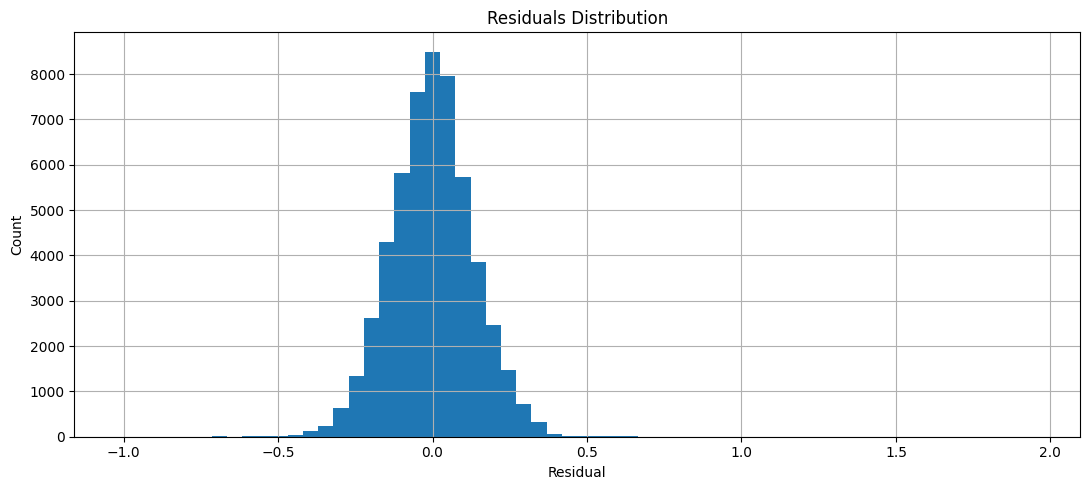

Model interpretation (quick):
- log_carat coefficient approximates price elasticity wrt carat; values >1 imply superlinear growth.
- Positive category coefficients (relative to omitted base) indicate higher prices for that quality tier.
- Residual spread suggests unexplained variation (e.g., fluorescence, brand, certification).


In [9]:
# Build design matrix using numpy (no statsmodels)
dfm = dfd[['carat','cut','color','clarity','price']].dropna().copy()
dfm = dfm[(dfm['carat']>0) & (dfm['price']>0)]
dfm['log_price'] = np.log(dfm['price'])
dfm['log_carat'] = np.log(dfm['carat'])

# One-hot encode limited categories to avoid singular matrices
def one_hot(series, prefix):
    d = pd.get_dummies(series, prefix=prefix, dtype=float)  # ensure float dtype here
    if d.shape[1] > 0:
        d = d.iloc[:, 1:]  # drop first to avoid dummy trap
    return d

X = pd.concat([
    pd.Series(1.0, index=dfm.index, name='const'),
    dfm[['log_carat']],
    one_hot(dfm['cut'], 'cut'),
    one_hot(dfm['color'], 'color'),
    one_hot(dfm['clarity'], 'clarity'),
], axis=1)

# Ensure numeric dtype for the whole matrix
X = X.astype(float)

y = dfm['log_price'].astype(float).values
X_mat = X.values

# Fit using least squares
beta, *_ = np.linalg.lstsq(X_mat, y, rcond=None)

coefs = pd.Series(beta, index=X.columns).sort_values(ascending=False)
print("Coefficients (log-price scale):")
display(coefs)

# Fit values & residuals
y_hat = X_mat @ beta
resid = y - y_hat

plt.scatter(dfm['log_carat'], dfm['log_price'], s=6, alpha=0.2, label='observed')
plt.scatter(dfm['log_carat'], y_hat, s=6, alpha=0.2, label='fitted')
plt.title('log(Price) vs log(Carat): Observed vs Fitted')
plt.xlabel('log(Carat)')
plt.ylabel('log(Price)')
plt.legend()
plt.tight_layout()
plt.show()

plt.hist(resid, bins=60)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("Model interpretation (quick):")
print("- log_carat coefficient approximates price elasticity wrt carat; values >1 imply superlinear growth.")
print("- Positive category coefficients (relative to omitted base) indicate higher prices for that quality tier.")
print("- Residual spread suggests unexplained variation (e.g., fluorescence, brand, certification).")



## 6) Connecting Gold & Diamonds — Narrative & Thought Experiment

In [11]:

print("""
While the diamonds dataset lacks dates, we can juxtapose materials economics:

• Gold jewelry: retail prices are sensitive to the underlying gold price; margin structures and hedging dampen short-term pass-through.
• Diamond pricing: primarily driven by the 4Cs (carat, cut, color, clarity), with nonlinear scaling by carat and discrete quality jumps.

Thought experiment:
If a typical ring uses ~0.15 oz of gold, a $100/oz increase in gold adds ~$15 to cost of goods.
For a mid-market ring priced at $1,000–$2,000, this is ~0.75–1.5% of price — often within promo/markup noise.
Hence, gold swings visibly affect **metal-heavy** items (chains/bracelets) more than diamond solitaires, where the stone dominates price.

This helps explain why gold price cycles show up clearly in metal-forward categories, while diamond pricing remains tightly tied to the 4Cs.
""")



While the diamonds dataset lacks dates, we can juxtapose materials economics:

• Gold jewelry: retail prices are sensitive to the underlying gold price; margin structures and hedging dampen short-term pass-through.
• Diamond pricing: primarily driven by the 4Cs (carat, cut, color, clarity), with nonlinear scaling by carat and discrete quality jumps.

Thought experiment:
If a typical ring uses ~0.15 oz of gold, a $100/oz increase in gold adds ~$15 to cost of goods.
For a mid-market ring priced at $1,000–$2,000, this is ~0.75–1.5% of price — often within promo/markup noise.
Hence, gold swings visibly affect **metal-heavy** items (chains/bracelets) more than diamond solitaires, where the stone dominates price.

This helps explain why gold price cycles show up clearly in metal-forward categories, while diamond pricing remains tightly tied to the 4Cs.



## 7) Diamonds — Stratified Price-per-Carat Visuals

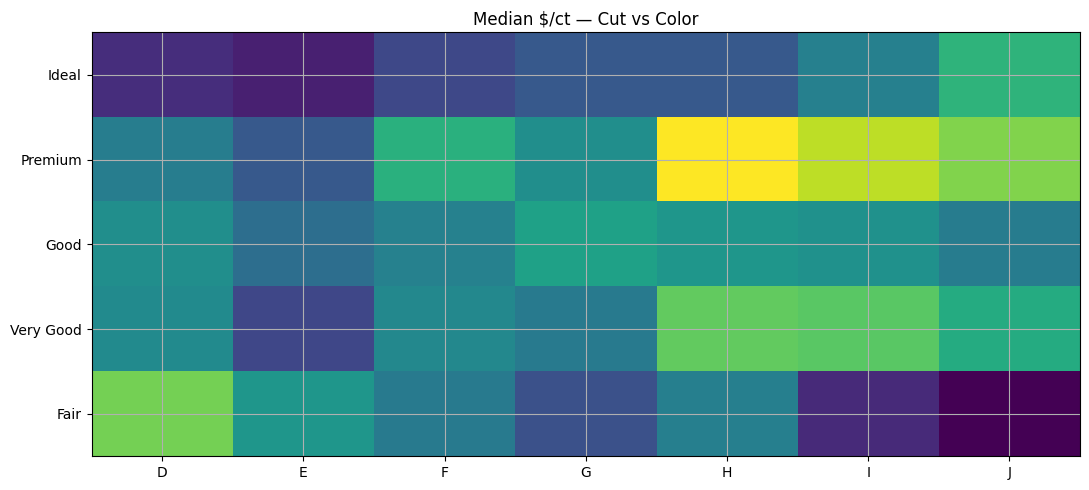

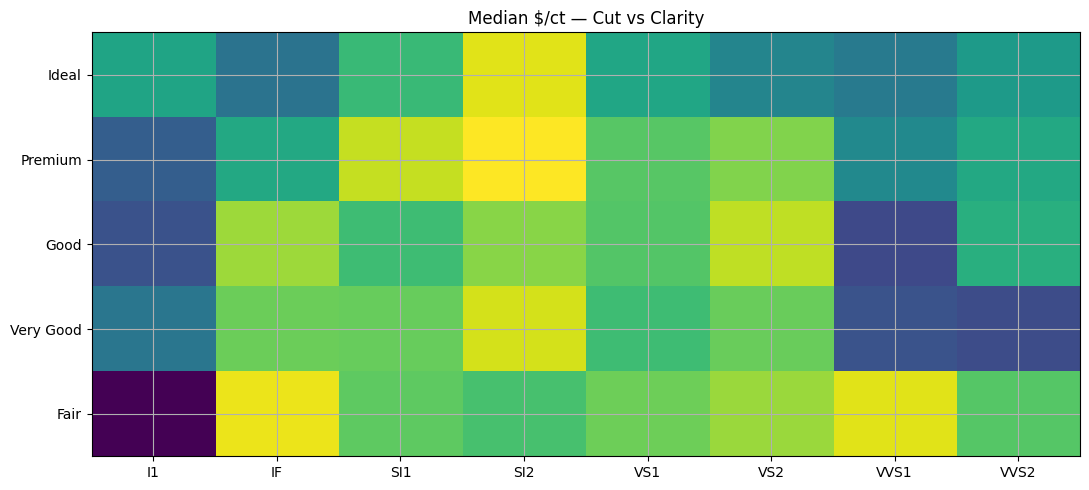

Visual takeaways:
- Clear monotonic steps across quality tiers (better cut/color/clarity → higher $/ct).
- Interactions matter: top quality combinations command outsized premiums.


In [12]:

# Prepare categorical orderings
order_cut = list(dfd['cut'].dropna().unique())
order_color = sorted(dfd['color'].dropna().unique())
order_clarity = sorted(dfd['clarity'].dropna().unique())

# Median $/ct by (cut, color) heatmap via imshow
pivot_cc = dfd.pivot_table(index='cut', columns='color', values='price_per_carat', aggfunc='median')
pivot_cc = pivot_cc.reindex(index=order_cut, columns=order_color)

fig, ax = plt.subplots()
im = ax.imshow(pivot_cc.values, aspect='auto')
ax.set_xticks(range(len(pivot_cc.columns))); ax.set_xticklabels(pivot_cc.columns)
ax.set_yticks(range(len(pivot_cc.index))); ax.set_yticklabels(pivot_cc.index)
ax.set_title('Median $/ct — Cut vs Color')
plt.tight_layout(); plt.show()

# Median $/ct by (cut, clarity)
pivot_ccl = dfd.pivot_table(index='cut', columns='clarity', values='price_per_carat', aggfunc='median')
pivot_ccl = pivot_ccl.reindex(index=order_cut, columns=order_clarity)

fig, ax = plt.subplots()
im = ax.imshow(pivot_ccl.values, aspect='auto')
ax.set_xticks(range(len(pivot_ccl.columns))); ax.set_xticklabels(pivot_ccl.columns)
ax.set_yticks(range(len(pivot_ccl.index))); ax.set_yticklabels(pivot_ccl.index)
ax.set_title('Median $/ct — Cut vs Clarity')
plt.tight_layout(); plt.show()

print("Visual takeaways:")
print("- Clear monotonic steps across quality tiers (better cut/color/clarity → higher $/ct).")
print("- Interactions matter: top quality combinations command outsized premiums.")


## 8) Gold — Simple Regime Detection & Annotations

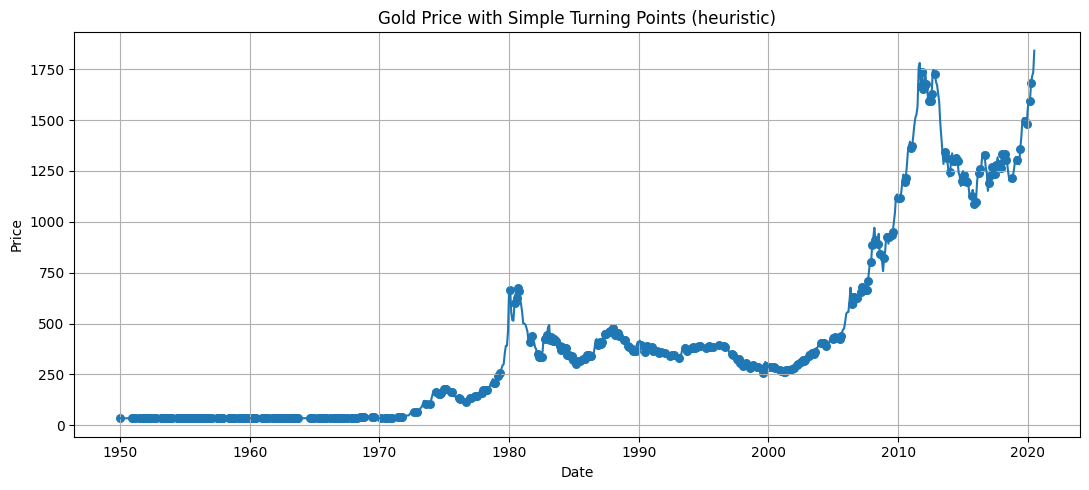

Interpretation: turning points (heuristic) highlight regime shifts. They’re sensitive to noise; smoothing and domain context are important.


In [14]:

# Identify local peaks/troughs (very simple rule)
dg = dfg.copy()
dg['diff'] = dg['gold_price'].diff()
dg['sign'] = np.sign(dg['diff']).fillna(0)
dg['turn'] = (dg['sign'] != dg['sign'].shift(1)).astype(int)
turn_points = dg[dg['turn']==1].copy()

plt.plot(dfg['date'], dfg['gold_price'])
plt.scatter(turn_points['date'], dfg.set_index('date').loc[turn_points['date'],'gold_price'], s=30)
plt.title('Gold Price with Simple Turning Points (heuristic)')
plt.xlabel('Date'); plt.ylabel('Price')
plt.tight_layout(); plt.show()

print("Interpretation: turning points (heuristic) highlight regime shifts. They’re sensitive to noise; smoothing and domain context are important.")


## 9) Executive Summary (as written by Om Arvadia)

In [16]:

print("""
Key insights:
1) Gold prices exhibit multi‑year cycles with variable volatility; moving averages and volatility windows help manage procurement and pricing risk.
2) Diamonds show strong, nonlinear price scaling with carat and clear premiums by cut/color/clarity; log‑transform models are informative.
3) Price-per-carat heatmaps make quality-tier premiums obvious and are useful for merchandising and education.
4) Material cost pass-through differs by category: gold swings impact metal‑forward items more than diamond‑dominant pieces.

Next steps:
• Add retailer transaction data to link gold cycles to jewelry category margins (chains, bracelets, bands). 
• If dated diamond indices are available, test co-movement with macro cycles and marketing calendar.
• Build a simple pricing assistant: suggest price ranges given (carat, cut, color, clarity) using the fitted model.

— Om Arvadia
""")



Key insights:
1) Gold prices exhibit multi‑year cycles with variable volatility; moving averages and volatility windows help manage procurement and pricing risk.
2) Diamonds show strong, nonlinear price scaling with carat and clear premiums by cut/color/clarity; log‑transform models are informative.
3) Price-per-carat heatmaps make quality-tier premiums obvious and are useful for merchandising and education.
4) Material cost pass-through differs by category: gold swings impact metal‑forward items more than diamond‑dominant pieces.

Next steps:
• Add retailer transaction data to link gold cycles to jewelry category margins (chains, bracelets, bands). 
• If dated diamond indices are available, test co-movement with macro cycles and marketing calendar.
• Build a simple pricing assistant: suggest price ranges given (carat, cut, color, clarity) using the fitted model.

— Om Arvadia

